In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
infection = pd.read_csv('Classeur.csv', sep=";",index_col='Date',parse_dates=True)

(67, 1) (67, 1) (67, 1)


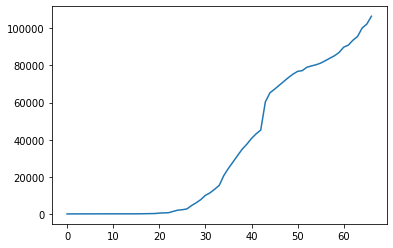

In [3]:
infection.head()
x=infection['Infected']
y=infection['Dead']
z=infection['Days']
x = x.values.reshape(x.shape[0],1)
y = y.values.reshape(y.shape[0],1)
z = z.values.reshape(z.shape[0],1)
plt.plot(z,x, markersize=4)
print(x.shape,y.shape,z.shape)

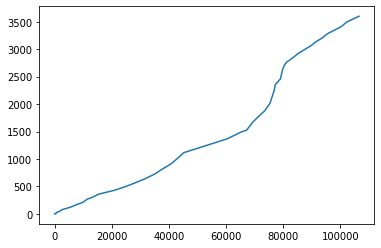

In [4]:
plt.plot(x,y, markersize=4)

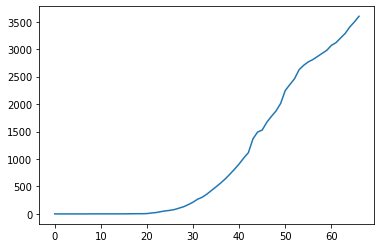

In [5]:
plt.plot(z,y, markersize=4)

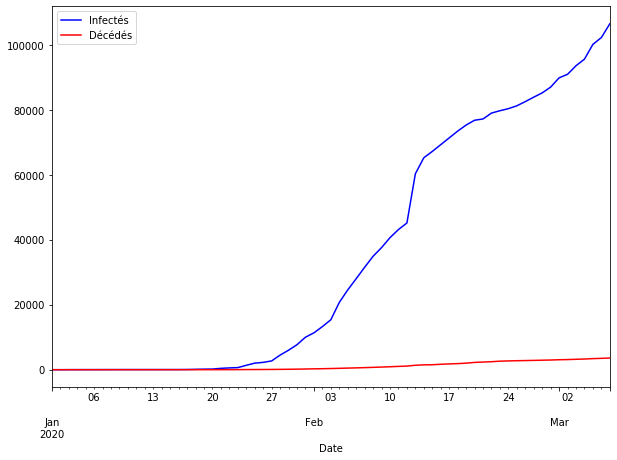

In [6]:
plt.figure(figsize=(10,7))
infection['Infected'].plot(label="Infectés",color='blue')
infection['Dead'].plot(label="Décédés",color='red')
plt.legend()

In [7]:
Z = np.hstack((z**3,np.ones(z.shape)))
#X
#Y = np.hstack((y,np.ones(z.shape)))
Z

array([[0.00000e+00, 1.00000e+00],
       [1.00000e+00, 1.00000e+00],
       [8.00000e+00, 1.00000e+00],
       [2.70000e+01, 1.00000e+00],
       [6.40000e+01, 1.00000e+00],
       [1.25000e+02, 1.00000e+00],
       [2.16000e+02, 1.00000e+00],
       [3.43000e+02, 1.00000e+00],
       [5.12000e+02, 1.00000e+00],
       [7.29000e+02, 1.00000e+00],
       [1.00000e+03, 1.00000e+00],
       [1.33100e+03, 1.00000e+00],
       [1.72800e+03, 1.00000e+00],
       [2.19700e+03, 1.00000e+00],
       [2.74400e+03, 1.00000e+00],
       [3.37500e+03, 1.00000e+00],
       [4.09600e+03, 1.00000e+00],
       [4.91300e+03, 1.00000e+00],
       [5.83200e+03, 1.00000e+00],
       [6.85900e+03, 1.00000e+00],
       [8.00000e+03, 1.00000e+00],
       [9.26100e+03, 1.00000e+00],
       [1.06480e+04, 1.00000e+00],
       [1.21670e+04, 1.00000e+00],
       [1.38240e+04, 1.00000e+00],
       [1.56250e+04, 1.00000e+00],
       [1.75760e+04, 1.00000e+00],
       [1.96830e+04, 1.00000e+00],
       [2.19520e+04,

In [8]:
theta = np.random.randn(2,1)
print(theta)

[[0.14981314]
 [0.85110138]]


In [9]:
def model(X,theta):
    return X.dot(theta)

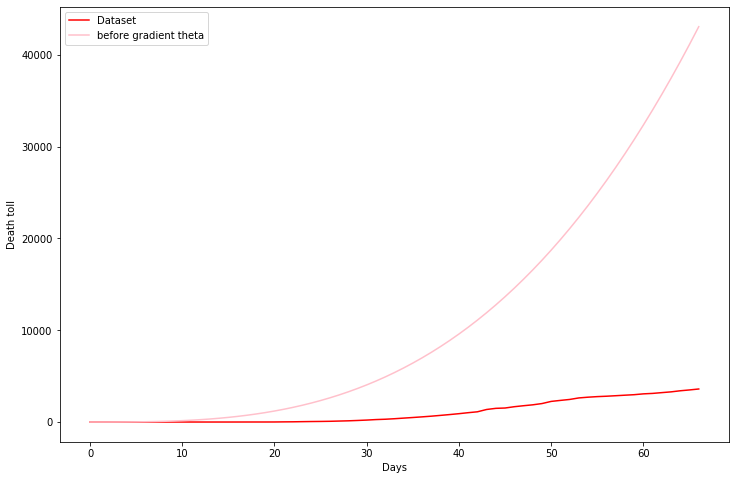

In [10]:
plt.figure(figsize=(12,8))
plt.xlabel('Days')
plt.ylabel('Death toll')
plt.plot(z,y, c='red', label='Dataset')

plt.plot(z,model(Z,theta), c='pink',label='before gradient theta')
plt.legend()

In [11]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [12]:
print(cost_function(Z,y,theta))

112304335.81405078


In [13]:
def grad(X,y,theta):
    m = len(y)
    return 1/m*X.T.dot(model(X,theta)- y)

In [14]:
print(grad(Z,y,theta))

[[1.65910144e+09]
 [9.88374212e+03]]


In [15]:
def gradient_descent(X,y,theta, learningRate,n_iterations):
    theta_history = np.zeros((n_iterations,2))
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learningRate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
        theta_history[i,:]=theta.T
    return theta, cost_history,theta_history

In [16]:
learning_rate = 0.0000000001
n_iterations=1000
theta_final, cost_history, theta_history = gradient_descent(Z,y,theta,learning_rate,n_iterations)

In [17]:
print(theta_final)
print(theta_history.shape)

[[0.01446069]
 [0.85109977]]
(1000, 2)


In [18]:
prediction=model(Z,theta_final)

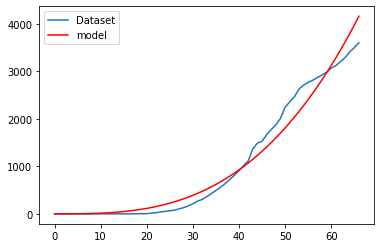

In [19]:
plt.plot(z,y, label='Dataset')
plt.plot(z,prediction,color='r',label='model')
plt.legend()

In [20]:
#y=A*r**x
testpred = theta_final.item(0)*(35**2)+theta_final.item(1) # Number of death= theta(1)*nb of days + theta(0)
testpred

18.56544270893292

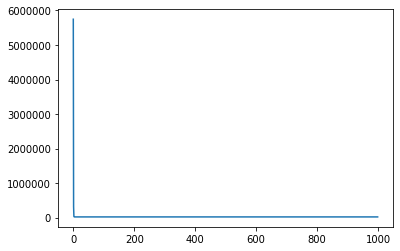

In [21]:
plt.plot(range(n_iterations),cost_history)

In [22]:
def coef_deter(y,pred):
    u= ((y-pred)**2).sum()
    v= ((y-y.mean())**2).sum()
    return 1 - u/v

In [23]:
coef_deter(y,prediction) # Not linear problem 0.45 

0.9700952103082808

In [24]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression()
reg2 = LinearRegression()

In [26]:
reg.fit(x,y)
reg2.fit(Z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
reg2.score(Z,y)

0.9701704240563769

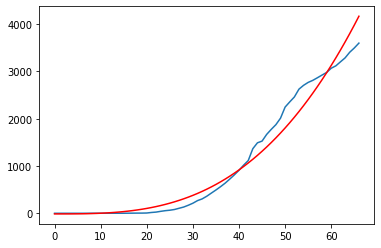

In [28]:
y_pred2 = reg2.predict(Z)
plt.plot(z,y)
plt.plot(z,y_pred2,c='r')

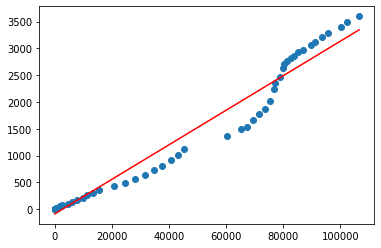

In [29]:
y_pred = reg.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,c='r')

In [30]:
reg.predict([[50000]])

array([[1524.60103375]])